<a href="https://colab.research.google.com/github/balaajhi/One-step-at-a-time/blob/main/Calculating_the_Return_of_a_Portfolio_of_Securities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install yfinance

     |████████████████████████████████| 6.4 MB 12.5 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
tickers = ['PG', 'MSFT', 'F', 'GE']

import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ['PG', 'MSFT', 'F', 'GE']
start = dt.datetime.today()-dt.timedelta(12000)
end = dt.datetime.today()
mydata = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    mydata[ticker] = yf.download(ticker,start,end,interval = '1d')["Adj Close"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8280 entries, 1989-04-03 to 2022-02-08
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      8280 non-null   float64
 1   MSFT    8280 non-null   float64
 2   F       8280 non-null   float64
 3   GE      8280 non-null   float64
dtypes: float64(4)
memory usage: 323.4 KB


In [5]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1989-04-03,2.573465,0.220305,2.876275,12.261346
1989-04-04,2.552629,0.219209,2.832585,12.227386
1989-04-05,2.556100,0.220853,2.767050,12.227386
1989-04-06,2.538736,0.224689,2.730641,12.159447
1989-04-07,2.545682,0.224689,2.781613,12.261346


In [6]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-02-02,162.600006,313.459991,20.629999,98.040001
2022-02-03,164.139999,301.250000,19.889999,98.320000
2022-02-04,161.529999,305.940002,17.959999,99.010002
2022-02-07,160.320007,300.950012,17.889999,99.900002
2022-02-08,159.960007,304.559998,17.719999,99.309998


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [7]:
mydata.iloc[0]

PG       2.573465
MSFT     0.220305
F        2.876275
GE      12.261346
Name: 1989-04-03 00:00:00, dtype: float64

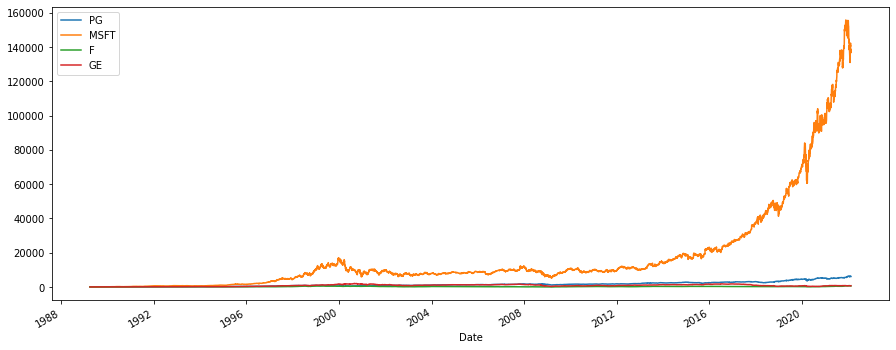

In [8]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

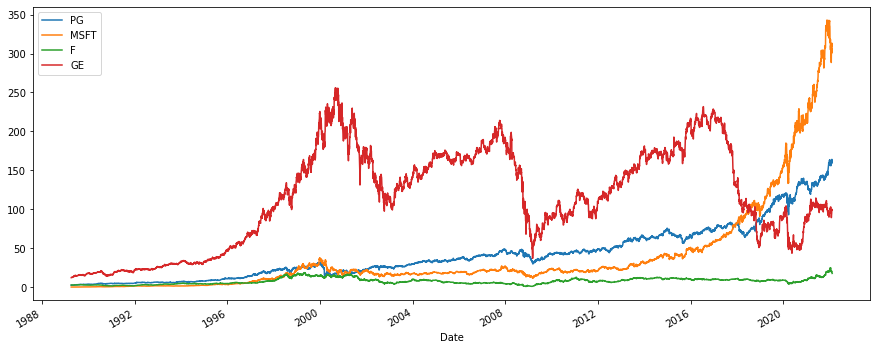

In [9]:
mydata.plot(figsize=(15,6))
plt.show()

In [10]:
mydata.loc['1995-01-03']

PG       7.971122
MSFT     2.374855
F        4.335945
GE      32.877304
Name: 1995-01-03 00:00:00, dtype: float64

In [11]:
mydata.iloc[0]

PG       2.573465
MSFT     0.220305
F        2.876275
GE      12.261346
Name: 1989-04-03 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [12]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1989-04-03,NaN,NaN,NaN,NaN
1989-04-04,-0.008097,-0.004975,-0.015190,-0.002770
1989-04-05,0.001360,0.007500,-0.023136,0.000000
1989-04-06,-0.006793,0.017371,-0.013158,-0.005556
1989-04-07,0.002736,0.000000,0.018667,0.008380


In [13]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [14]:
np.dot(returns, weights)

array([        nan, -0.0077578 , -0.00356903, ..., -0.02258709,
       -0.00467743, -0.00141467])

***

In [15]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.149406
MSFT    0.268794
F       0.128074
GE      0.108992
dtype: float64

In [16]:
np.dot(annual_returns, weights)

0.16381676067657475

In [17]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

16.381999999999998 %


***

In [18]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [19]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

16.381999999999998 %
19.194 %
